# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [53]:
df_raw = pd.read_csv('DataPenjualanMotor.csv', sep=";")
df.head()

,CABANG,PROPINSI,NO ORDER,TANGGAL,SUMBER,SERIES,HARGA JUAL,DISKON,JENIS BAYAR,HARGA_JUAL_BIN,DISKON_BIN
1,FKH SAMARINDA,KALIMANTANTIMUR,BTDSRI220400078,2022-05-04,OFFLINE,VARIO 160,30820000,0,TUNAI,Mahal,Diskon_Rendah
3,FKH KLUNGKUNG,BALI,BTDKLG220500001,2022-05-06,OFFLINE,BEAT,17910000,0,TUNAI,Murah,Diskon_Rendah
4,FKH KLUNGKUNG,BALI,BTDKLG220500002,2022-05-04,OFFLINE,BEAT,17910000,0,TUNAI,Murah,Diskon_Rendah
5,FKH BANGLI,BALI,BTDBGL220400071,2022-05-04,OFFLINE,SCOOPY,22740000,0,TUNAI,Sedang,Diskon_Rendah
6,FKH BANGLI,BALI,BTDBGL220400085,2022-05-04,OFFLINE,SCOOPY,22740000,0,TUNAI,Sedang,Diskon_Rendah


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [13]:
df.shape

(4621, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CABANG       4621 non-null   object
 1   PROPINSI     4618 non-null   object
 2   NO ORDER     4621 non-null   object
 3   TANGGAL      4621 non-null   object
 4   SUMBER       4621 non-null   object
 5   SERIES       4621 non-null   object
 6   HARGA JUAL   4621 non-null   object
 7   DISKON       4621 non-null   object
 8   JENIS BAYAR  4621 non-null   object
dtypes: object(9)
memory usage: 325.0+ KB


In [15]:
df.describe(include='all')

,CABANG,PROPINSI,NO ORDER,TANGGAL,SUMBER,SERIES,HARGA JUAL,DISKON,JENIS BAYAR
count,4621,4618,4621,4621,4621,4621,4621,4621,4621
unique,375,29,4621,26,2,20,987,157,2
top,FKH SEMARANG,JAWATENGAH,BTDBTL220500029,31-May-22,OFFLINE,BEAT,18.870.000,0,KREDIT
freq,108,888,1,415,4255,1087,87,4008,3932


In [26]:
df.dtypes

,0
CABANG,object
PROPINSI,object
NO ORDER,object
TANGGAL,datetime64[ns]
SUMBER,object
SERIES,object
HARGA JUAL,int64
DISKON,int64
JENIS BAYAR,object


In [27]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
PROPINSI,3


In [28]:
df.duplicated().sum()

np.int64(0)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [37]:
df["HARGA JUAL"] = (
    df["HARGA JUAL"].astype(str)
    .str.replace(".", "", regex=False)
    .astype("int64")
)

df["DISKON"] = (
    df["DISKON"].astype(str)
    .str.replace(".", "", regex=False)
    .astype("int64")
)

df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], format="%d-%b-%y", errors="coerce")


df.dtypes

,0
CABANG,object
PROPINSI,object
NO ORDER,object
TANGGAL,datetime64[ns]
SUMBER,object
SERIES,object
HARGA JUAL,int64
DISKON,int64
JENIS BAYAR,object


In [39]:
# Kolom numerik & kategorikal
num_cols = ["HARGA JUAL", "DISKON"]
cat_cols = ["CABANG", "PROPINSI", "NO ORDER", "SUMBER", "SERIES", "JENIS BAYAR"]

print("Missing sebelum penanganan:")
print(df.isnull().sum())

# Drop baris yang sangat penting tapi kosong (misal TANGGAL atau HARGA JUAL)
df = df.dropna(subset=["TANGGAL", "HARGA JUAL"])

# Isi missing numerik dengan median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Isi missing kategorikal dengan modus (nilai terbanyak)
for col in cat_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing SESUDAH penanganan:")
print(df.isnull().sum())


Missing sebelum penanganan:
CABANG         0
PROPINSI       3
NO ORDER       0
TANGGAL        0
SUMBER         0
SERIES         0
HARGA JUAL     0
DISKON         0
JENIS BAYAR    0
dtype: int64

Missing SESUDAH penanganan:
CABANG         0
PROPINSI       0
NO ORDER       0
TANGGAL        0
SUMBER         0
SERIES         0
HARGA JUAL     0
DISKON         0
JENIS BAYAR    0
dtype: int64


In [40]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"{col} | lower={lower:.0f}, upper={upper:.0f}")
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Simpan jumlah baris sebelum & sesudah
print("Sebelum buang outlier:", df.shape[0])
for col in ["HARGA JUAL", "DISKON"]:
    df = remove_outliers_iqr(df, col)
print("Sesudah buang outlier:", df.shape[0])


Sebelum buang outlier: 4621
HARGA JUAL | lower=9000000, upper=37480000
DISKON | lower=0, upper=0
Sesudah buang outlier: 3962


In [41]:
# Binning harga jual → 3 kelompok berdasarkan quantile
df["HARGA_JUAL_BIN"] = pd.qcut(
    df["HARGA JUAL"],
    q=3,
    labels=["Murah", "Sedang", "Mahal"]
)

# Kalau DISKON banyak nol, kita tetap pakai qcut tapi diurutkan dulu
df["DISKON_BIN"] = pd.qcut(
    df["DISKON"].rank(method="first"),
    q=3,
    labels=["Diskon_Rendah", "Diskon_Sedang", "Diskon_Tinggi"]
)

df[["HARGA JUAL", "HARGA_JUAL_BIN", "DISKON", "DISKON_BIN"]].head()


,HARGA JUAL,HARGA_JUAL_BIN,DISKON,DISKON_BIN
1,30820000,Mahal,0,Diskon_Rendah
3,17910000,Murah,0,Diskon_Rendah
4,17910000,Murah,0,Diskon_Rendah
5,22740000,Sedang,0,Diskon_Rendah
6,22740000,Sedang,0,Diskon_Rendah


In [42]:
cat_to_encode = [
    "CABANG",
    "PROPINSI",
    "SUMBER",
    "SERIES",
    "JENIS BAYAR",
    "HARGA_JUAL_BIN",
    "DISKON_BIN"
]

df_encoded = pd.get_dummies(df, columns=cat_to_encode, drop_first=True)

print("Shape setelah encoding:", df_encoded.shape)
df_encoded.head()


Shape setelah encoding: (3962, 418)


,NO ORDER,TANGGAL,HARGA JUAL,DISKON,CABANG_FKH ADIPALA,CABANG_FKH ADIWERNA,CABANG_FKH AJIBARANG,CABANG_FKH AMBARAWA,CABANG_FKH AMUNTAI,CABANG_FKH AMUNTAI TENGAH,...,SERIES_SUPRA X 125,SERIES_SUPRAX125,SERIES_VARIO 125,SERIES_VARIO 150,SERIES_VARIO 160,JENIS BAYAR_TUNAI,HARGA_JUAL_BIN_Sedang,HARGA_JUAL_BIN_Mahal,DISKON_BIN_Diskon_Sedang,DISKON_BIN_Diskon_Tinggi
1,BTDSRI220400078,2022-05-04,30820000,0,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
3,BTDKLG220500001,2022-05-06,17910000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,BTDKLG220500002,2022-05-04,17910000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,BTDBGL220400071,2022-05-04,22740000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
6,BTDBGL220400085,2022-05-04,22740000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [45]:
scaler = StandardScaler()

numeric_features = ["HARGA JUAL", "DISKON"]

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

df_encoded[numeric_features].describe()


,HARGA JUAL,DISKON
count,"3,962","3,962"
mean,0,0
std,1,0
min,-2,0
25%,-1,0
50%,-0,0
75%,0,0
max,3,0


In [46]:
pd.set_option('display.float_format', '{:,.0f}'.format)

print("Statistik deskriptif numerik")
display(df[["HARGA JUAL", "DISKON"]].describe())

print("\nFrekuensi kategori (TOP 10 CABANG)")
display(df["CABANG"].value_counts().head(10))

print("\nDistribusi jenis bayar")
display(df["JENIS BAYAR"].value_counts())


Statistik deskriptif numerik


,HARGA JUAL,DISKON
count,"3,962","3,962"
mean,"23,208,511",0
std,"4,873,421",0
min,"14,470,000",0
25%,"19,625,500",0
50%,"22,210,000",0
75%,"25,539,000",0
max,"37,470,000",0



Frekuensi kategori (TOP 10 CABANG)


,count
CABANG,
FKH SEMARANG,72
FKH TERNATE,71
FKH SINTANG,64
FKH SANGATTA UTARA,62
FKH KARAWANG,61
FKH BACAN,55
FKH BONE,53
FKH BONTANG,52
FKH TANGERANG,50



Distribusi jenis bayar


,count
JENIS BAYAR,
KREDIT,3719
TUNAI,243


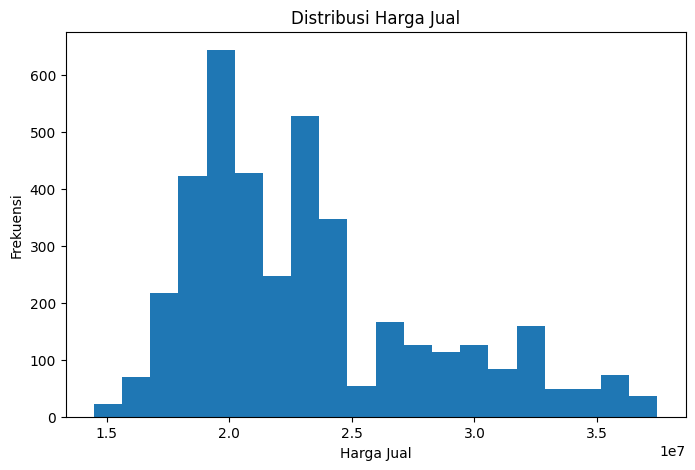

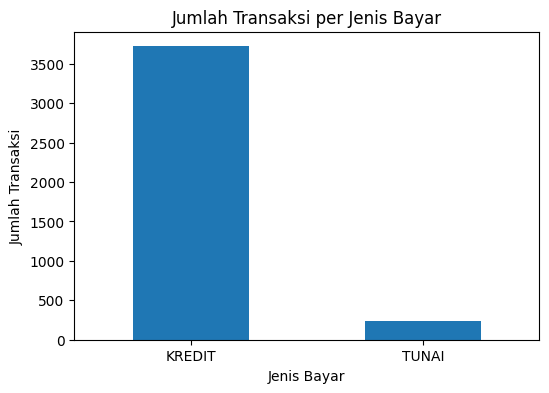

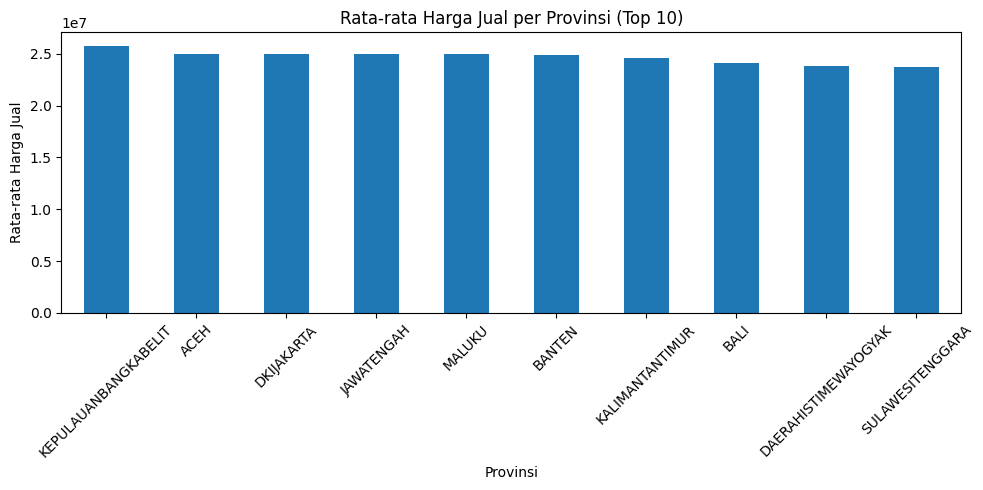

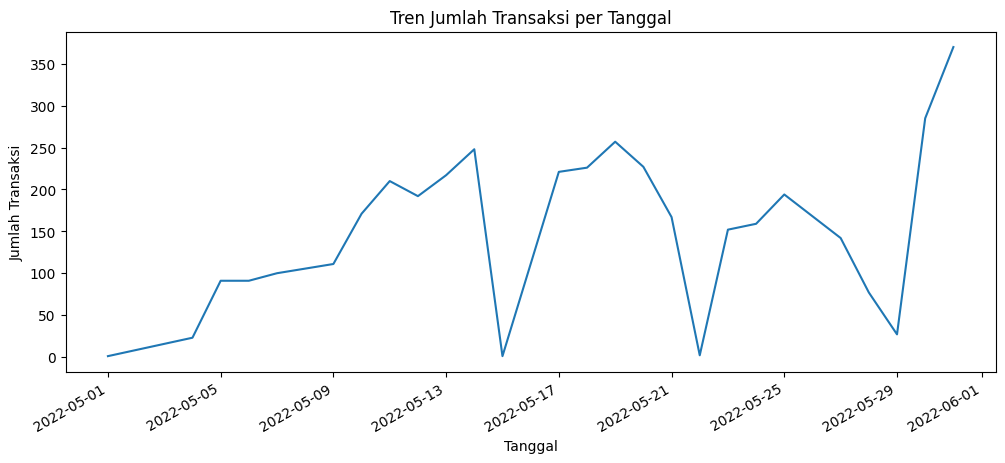

In [47]:
# Histogram HARGA JUAL
plt.figure(figsize=(8,5))
plt.hist(df["HARGA JUAL"], bins=20)
plt.title("Distribusi Harga Jual")
plt.xlabel("Harga Jual")
plt.ylabel("Frekuensi")
plt.show()

# Jumlah transaksi per jenis bayar
plt.figure(figsize=(6,4))
df["JENIS BAYAR"].value_counts().plot(kind="bar")
plt.title("Jumlah Transaksi per Jenis Bayar")
plt.xlabel("Jenis Bayar")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=0)
plt.show()

# Rata-rata harga jual per provinsi (TOP 10)
mean_price_by_prov = (
    df.groupby("PROPINSI")["HARGA JUAL"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
mean_price_by_prov.plot(kind="bar")
plt.title("Rata-rata Harga Jual per Provinsi (Top 10)")
plt.ylabel("Rata-rata Harga Jual")
plt.xlabel("Provinsi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tren jumlah transaksi per tanggal
daily_tx = df.groupby("TANGGAL").size()

plt.figure(figsize=(12,5))
daily_tx.plot()
plt.title("Tren Jumlah Transaksi per Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Tanggal")
plt.show()
